# Introduction  
Nom : Potvin  
Prénom : Ludovic  

Ce travail est divisé en 3 étapes clés :  
- Le remplacement des données manquantes.  
- L'ajustement des valeurs aberrantes (outliers).  
- La jointure d'un autre dataset au dataset customer.  

Le résultat final est regroupé dans un seul pipeline.  

> Note : Il y a aussi des étapes de normalisation dans le pipeline, telles que OneHotEncoder et StandardScaler, car elles vont faciliter le machine learning pour le devoir 2.  

# Q3.1 Reproduction des étapes 2 à 4 d'un projet de ML  

Cette question sera répondue à travers les réponses aux autres questions. Pour l'instant, il faut simplement importer les données.

In [1]:
import pandas as pd
import numpy as np

num_attribs = ['age', 'pages', 'News_click']
cat_attribs = ['first_item_prize', 'gender', 'ReBuy', 'country', 'revenue']

customer = pd.read_csv('Customer.csv')

# Q3.2 Nettoyage des données du dataset de base  

Première étape de nettoyage et de prise de conscience du dataset.  

# Q3.2.1 Remplacement des données manquantes  

In [2]:
customer.info()
print(customer.isna().sum())
print(customer.isnull().sum())

question_marks = (customer == '?').sum()
print('==Question mark==')
print(question_marks)

customer.describe(include='all')
customer.head()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  str    
 3   gender            10000 non-null  str    
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  str    
 7   revenue           10000 non-null  str    
dtypes: bool(1), float64(3), str(4)
memory usage: 556.8 KB
age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int64
age                 0
pages               0
first_item_prize    0
gender              0
ReBuy               0
News_click          0
country             0
revenue             0
dtype: int

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113
1,34.0,4.0,15.5,Fem,True,2.0,China,36
2,38.0,5.0,?,Fem,False,7.0,China,111
3,20.0,1.0,44.0,Fem,False,2.0,China,71
4,39.0,10.0,10.0,Fem,True,4.0,China,80


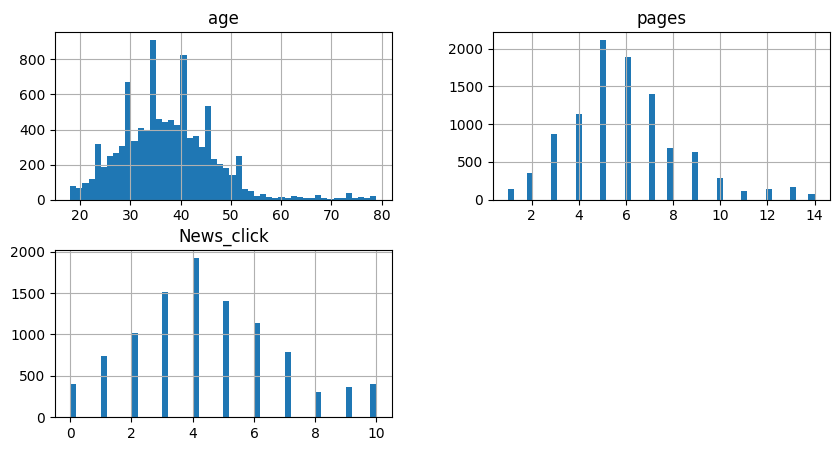

In [3]:
import matplotlib.pyplot as plt
customer.hist(bins=50, figsize=(10,5))
plt.show()

Il n’y a pas de valeurs nulles ou de NaN dans le dataset. Il y a cependant quelques `?` dans la colonne *first_item_prize*.  
La fonction suivante permet de les remplacer par des NaN.  

On pourra ensuite remplacer les NaN par la médiane dans le pipeline.

In [4]:
def replace_question_with_nan(X):
    X_copy = X.copy()
    X_copy = X_copy.replace('?', np.nan)
    return X_copy
    

# 3.2.2 Remplacement des données aberrantes  

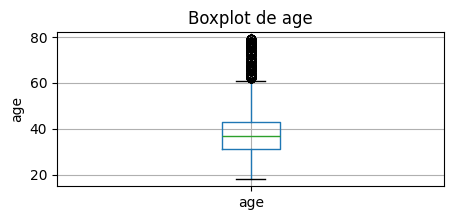

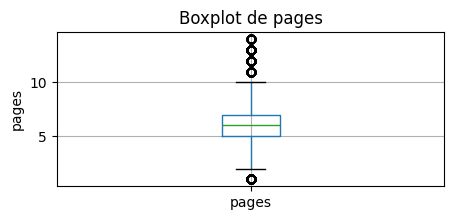

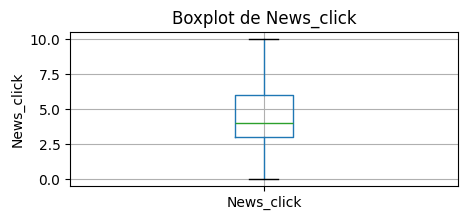

In [5]:
import matplotlib.pyplot as plt

for col in num_attribs:
    plt.figure(figsize=(5,2))
    customer.boxplot(column=col)
    plt.title(f"Boxplot de {col}")
    plt.ylabel(col)
plt.show()

À l’aide de ces graphiques, il est possible d’observer que les variables *pages* et *age* ont toutes les deux des outliers.  
La fonction suivante permettra de ramener les outliers avec les autres.

In [6]:
def iqr_amplitude(X):
    X_copy = X.copy()
    for col in X_copy:
        col_data = X_copy[col]

        Q1 = np.percentile(col_data, 25)
        Q3 = np.percentile(col_data, 75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Remplacer les valeurs < lower par Q1
        X_copy[col] = np.where(X_copy[col] < lower, Q1, X_copy[col])
        # Remplacer les valeurs > upper par Q3
        X_copy[col] = np.where(X_copy[col] > upper, Q3, X_copy[col])

    return X_copy

# Q3.3 Enrichissement des données  
## Exploration des autres datasets  

In [7]:
GDP = pd.read_csv('CountryGDP.csv')
GDP.info()
GDP.head()

<class 'pandas.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Country    188 non-null    str  
 1   GDP_inhab  188 non-null    int64
dtypes: int64(1), str(1)
memory usage: 3.1 KB


,Country,GDP_inhab
0,Qatar,100889
1,Luxembourg,77958
2,Singapore,60799
3,Norway,54397
4,Brunei,54114


In [8]:
population = pd.read_csv('CountryPopulation.csv')
population.info()
population.head()

<class 'pandas.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Country     220 non-null    str  
 1   population  220 non-null    int64
dtypes: int64(1), str(1)
memory usage: 3.6 KB


,Country,population
0,China,1360720000
1,India,1241100000
2,United States,317638000
3,Indonesia,249866000
4,Brazil,201032714


La fonction suivante permettra de joindre les datasets *CountryPopulation* et *CountryGDP* au dataset *customer*.

In [9]:
def enrichissement_population_pib(X, PIB=True):
    X_copy = X.copy()

    population = pd.read_csv('CountryPopulation.csv')
    population.rename(columns={"Country": "country"}, inplace=True)
    X_copy = pd.merge(X_copy, population, on='country') 
    
    if PIB:
        GDP = pd.read_csv('CountryGDP.csv')
        GDP.rename(columns={"Country": "country"}, inplace=True)
        X_copy = pd.merge(X_copy, GDP, on='country') 

    return X_copy

# Pipeline final
Voici le pipeline avec chaque étape. À noter qu'il est possible d'enlever le `StandardScaler` et le `OneHotEncoder` pour lire plus clairement le résultat. Les deux étapes sont présentes pour faciliter le machine learning dans le devoir 2.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

enrichissement_transformer = FunctionTransformer(enrichissement_population_pib, validate=False, kw_args={"PIB": True})

numeric_transformer = Pipeline([
    ("Replace question mark", FunctionTransformer(replace_question_with_nan, validate=False)),
    ("iqr outliers", FunctionTransformer(iqr_amplitude, validate=False)),
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_attribs + ['population', 'GDP_inhab']),
    ("cat", OneHotEncoder(), cat_attribs),
])

full_pipeline = Pipeline([
    ('enrich', enrichissement_transformer),
    ('preprocessor', preprocessor),
])

clean_customer = full_pipeline.fit_transform(customer)
customer_array = clean_customer.toarray()
pd.DataFrame(customer_array).info()
pd.DataFrame(customer_array).head()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 539 entries, 0 to 538
dtypes: float64(539)
memory usage: 41.1 MB


,0,1,2,3,4,5,6,7,8,9,...,529,530,531,532,533,534,535,536,537,538
0,0.514824,0.118756,-0.170381,0.76331,-0.359849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.349058,-0.955960,-0.997473,0.76331,-0.359849,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.144589,-0.418602,1.070257,0.76331,-0.359849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.076821,-0.418602,-0.997473,0.76331,-0.359849,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.268001,2.268188,-0.170381,0.76331,-0.359849,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
